# Convolutional Neural Network

### Importing the libraries

In [101]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [4]:
tf.__version__

'2.4.1'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/seg_train/seg_train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 14034 images belonging to 6 classes.


### Preprocessing the Test set

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/seg_test/seg_test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3000 images belonging to 6 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [7]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [11]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [12]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [13]:
cnn.add(tf.keras.layers.Dense(units=6, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [14]:
cnn.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [15]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
439/439 [==============================] - 282s 638ms/step - loss: 0.1047 - accuracy: 0.5058 - val_loss: 0.0729 - val_accuracy: 0.6793
Epoch 2/25
439/439 [==============================] - 50s 113ms/step - loss: 0.0725 - accuracy: 0.6849 - val_loss: 0.0685 - val_accuracy: 0.7217
Epoch 3/25
439/439 [==============================] - 49s 112ms/step - loss: 0.0621 - accuracy: 0.7364 - val_loss: 0.0597 - val_accuracy: 0.7557
Epoch 4/25
439/439 [==============================] - 49s 112ms/step - loss: 0.0552 - accuracy: 0.7713 - val_loss: 0.0615 - val_accuracy: 0.7510
Epoch 5/25
439/439 [==============================] - 48s 110ms/step - loss: 0.0525 - accuracy: 0.7878 - val_loss: 0.0524 - val_accuracy: 0.7890
Epoch 6/25
439/439 [==============================] - 49s 112ms/step - loss: 0.0494 - accuracy: 0.8017 - val_loss: 0.0498 - val_accuracy: 0.8037
Epoch 7/25
439/439 [==============================] - 48s 110ms/step - loss: 0.0449 - accuracy: 0.8230 - val_loss: 0.0502 - val_a

## Part 4 - Plotting accuracy and losses 

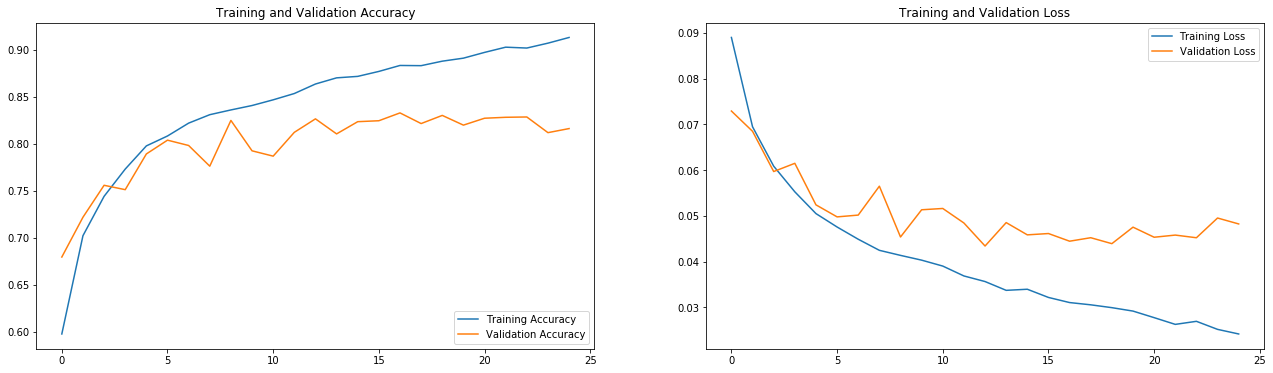

In [23]:
acc = cnn.history.history['accuracy']
val_acc = cnn.history.history['val_accuracy']

loss = cnn.history.history['loss']
val_loss = cnn.history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(22, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Part 5 - Prediction CSV generation

In [78]:
d = {0.0: 'buildings',
     1.0 : 'forest',
     2.0 :'glacier',
     3.0 : 'mountain',
     4.0 : 'sea',
     5.0 : 'street'}

In [120]:
def predict(x):
    d = {0.0: 'buildings',
     1.0 : 'forest',
     2.0 :'glacier',
     3.0 : 'mountain',
     4.0 : 'sea',
     5.0 : 'street'}
    
    test_image = image.load_img('./{}'.format(x), target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image)

    result = list(result[0])
    try:
        pos = result.index(1.0)
    except:
        pos = random.randint(0,5)

    return d[pos]

In [79]:
import pathlib
test_data_dir = pathlib.Path('dataset/seg_test/seg_test')

In [81]:
req = list(test_data_dir.glob('*/*.jpg'))

In [111]:
s = str(req[0])
s = s[5:]
s[0:s.find("/")]

'street'

In [122]:
"""
We have used a different folder structure here so results might appear different.
"""
f = open('prediction_2.csv', 'w')

for x in req:
    s = str(x)
    z = s
    pred = predict(s)
    z = z[5:]
    y = z[0:z.find("/")]
    i += 1
    c = "incorrect"
    if y == pred:
        c = "correct"
        
    finalstr = s[5:] + " " + pred + " " + c + ","
    f.writelines(finalstr)

f.close()